# E01

## Approach
Find ix given the last two characters.

In [1]:
from operator import concat

import torch

In [2]:
words = list(open('names.txt', 'r').read().splitlines())
words[:3]

['emma', 'olivia', 'ava']

In [3]:
l = ['.'] + sorted(set(i for w in words for i in w))
stoi = {s: i for i, s in enumerate(l)}
itos = {i: s for i, s in enumerate(l)}

In [4]:
# E02
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]


In [5]:
N = torch.zeros([27, 27, 27], dtype=torch.int32)
for w in words_test:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        N[stoi[c1], stoi[c2], stoi[c3]] += 1
N

tensor([[[   0, 3425, 1025,  ...,  104,  442,  731],
         [   0,  143,  165,  ...,   15,  126,  117],
         [   0,  134,    0,  ...,    0,    2,    0],
         ...,
         [   0,   40,    0,  ...,    1,   10,   11],
         [   0,  219,    0,  ...,    0,    0,    1],
         [   0,  368,    0,  ...,    0,   71,    2]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  36,    0,    2,  ...,    0,   20,    5],
         [  31,   24,   19,  ...,    0,    7,    0],
         ...,
         [   4,    3,    0,  ...,   10,   10,    4],
         [ 134,  307,   14,  ...,    0,   13,   29],
         [  21,   89,    0,  ...,    0,   11,   16]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  32,    6,    2,  ...,    2,   28,    0],
         [   0,    9,    0,  ...,    0,    4,    0],
         ...,
         [   0,    0,    0,  ...,    0,    0,    0],
         [  42,    4,    0,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0]],

In [6]:
N.shape

torch.Size([27, 27, 27])

In [7]:
N += 1
P = N.float()
P /= P.sum(2, keepdim=True)
P[0]

tensor([[3.8982e-05, 1.3355e-01, 3.9995e-02, 4.7870e-02, 5.2392e-02, 5.0014e-02,
         1.2123e-02, 2.1440e-02, 2.7092e-02, 1.7230e-02, 7.5547e-02, 9.3712e-02,
         5.0170e-02, 8.0108e-02, 3.5045e-02, 1.2513e-02, 1.6762e-02, 2.6118e-03,
         5.2275e-02, 6.4671e-02, 4.0502e-02, 2.4169e-03, 1.1734e-02, 1.0291e-02,
         4.0931e-03, 1.7269e-02, 2.8535e-02],
        [2.8969e-04, 4.1715e-02, 4.8088e-02, 6.3731e-03, 8.1402e-02, 1.3905e-02,
         5.5041e-03, 3.7659e-03, 1.8830e-02, 3.4762e-02, 5.7937e-03, 2.0857e-02,
         1.4687e-01, 8.3140e-02, 1.3499e-01, 3.7659e-03, 2.8969e-03, 1.7381e-03,
         1.1472e-01, 4.2584e-02, 2.0278e-02, 3.4762e-02, 5.5910e-02, 1.4484e-03,
         4.6350e-03, 3.6790e-02, 3.4183e-02],
        [9.5057e-04, 1.2833e-01, 9.5057e-04, 9.5057e-04, 9.5057e-04, 1.9582e-01,
         9.5057e-04, 9.5057e-04, 5.7034e-03, 3.0418e-02, 9.5057e-04, 9.5057e-04,
         7.3194e-02, 9.5057e-04, 9.5057e-04, 4.9430e-02, 9.5057e-04, 9.5057e-04,
         4.8194e-

In [8]:
for i in range(10):
    ix = 0
    out = ['.', '.']
    while True:
        ix = torch.multinomial(P[stoi[out[-2]], stoi[out[-1]]], 1, replacement=True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

..colyn
..hxgystelanna
..sathm
..lethiya
..karishtifnpaxpipczpqase
..isleeley
..ren
..davoryel
..vana
..macarobinenni


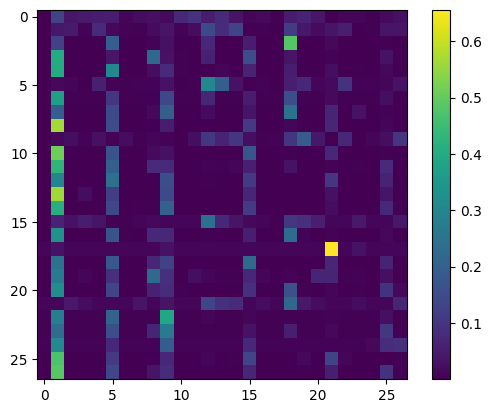

In [9]:
import matplotlib.pyplot as plt

plt.imshow(P[0])
plt.colorbar()

In [10]:
P[0][0]

tensor([3.8982e-05, 1.3355e-01, 3.9995e-02, 4.7870e-02, 5.2392e-02, 5.0014e-02,
        1.2123e-02, 2.1440e-02, 2.7092e-02, 1.7230e-02, 7.5547e-02, 9.3712e-02,
        5.0170e-02, 8.0108e-02, 3.5045e-02, 1.2513e-02, 1.6762e-02, 2.6118e-03,
        5.2275e-02, 6.4671e-02, 4.0502e-02, 2.4169e-03, 1.1734e-02, 1.0291e-02,
        4.0931e-03, 1.7269e-02, 2.8535e-02])

In [11]:
# loss
nll = 0.0
n = 0
for w in words_dev:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        prob = P[stoi[c1], stoi[c2], stoi[c3]]
        nll += -prob.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(101640.9375), 2.2304842472076416


# E02

In [12]:
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]

In [13]:
words_dev

['raelin',
 'skye',
 'mico',
 'adelita',
 'shaheer',
 'jalia',
 'derionna',
 'tarah',
 'neyla',
 'embry',
 'miqueas',
 'caire',
 'tiegan',
 'harley',
 'loralai',
 'mayer',
 'mileva',
 'trinityrose',
 'dalbert',
 'khyler',
 'ragnar',
 'natan',
 'eridani',
 'jaquay',
 'jhonatan',
 'kosta',
 'yarexi',
 'rigdon',
 'srihitha',
 'millicent',
 'kowen',
 'madisynn',
 'adaira',
 'nalla',
 'xela',
 'olamiposi',
 'massimo',
 'kamar',
 'ifrah',
 'wilson',
 'daya',
 'portlyn',
 'catalea',
 'arihan',
 'naika',
 'arbor',
 'jayana',
 'nyra',
 'braileigh',
 'aliya',
 'danny',
 'gulianna',
 'felicitas',
 'skyleigh',
 'honestee',
 'jacy',
 'dalaya',
 'alia',
 'samar',
 'evers',
 'blakelee',
 'rhaegar',
 'isaack',
 'masyn',
 'adryel',
 'myson',
 'makenah',
 'ryka',
 'leeum',
 'damiyah',
 'rhenn',
 'dutchess',
 'kenn',
 'merrin',
 'avrianna',
 'adir',
 'sahej',
 'amy',
 'suhaylah',
 'mehdi',
 'alissia',
 'shamere',
 'raia',
 'ivori',
 'arabela',
 'abraxas',
 'taysom',
 'adeola',
 'cartier',
 'braysen',
 'n

## Bigram Model (Probabilistic)

In [14]:
Nbi = torch.zeros([27, 27])
for w in words:
    word = "." + w + "."
    for c1, c2 in zip(word, word[1:]):
        Nbi[stoi[c1], stoi[c2]] += 1
N

tensor([[[   1, 3426, 1026,  ...,  105,  443,  732],
         [   1,  144,  166,  ...,   16,  127,  118],
         [   1,  135,    1,  ...,    1,    3,    1],
         ...,
         [   1,   41,    1,  ...,    2,   11,   12],
         [   1,  220,    1,  ...,    1,    1,    2],
         [   1,  369,    1,  ...,    1,   72,    3]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  37,    1,    3,  ...,    1,   21,    6],
         [  32,   25,   20,  ...,    1,    8,    1],
         ...,
         [   5,    4,    1,  ...,   11,   11,    5],
         [ 135,  308,   15,  ...,    1,   14,   30],
         [  22,   90,    1,  ...,    1,   12,   17]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  33,    7,    3,  ...,    3,   29,    1],
         [   1,   10,    1,  ...,    1,    5,    1],
         ...,
         [   1,    1,    1,  ...,    1,    1,    1],
         [  43,    5,    1,  ...,    1,    1,    1],
         [   1,    1,    1,  ...,    1,    1,    1]],

In [15]:
Pbi = (Nbi + 0).float()
Pbi /= Pbi.sum(1, keepdim=True)
Pbi

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [16]:
for i in range(5):
    ix = 0
    out = []
    while True:
        ix = torch.multinomial(Pbi[ix], 1, True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

je
kosiy
an
t
a


In [17]:
Pbi[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [18]:
# loss
nll = 0.
n = 0
for w in words_dev:
    word = "." + w + "."
    for ch1, ch2 in zip(word, word[1:]):
        probs = Pbi[stoi[ch1], stoi[ch2]]
        nll += -probs.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(112077.0156), 2.4474704265594482


## Single Neuron Prediction
Bi-gram

In [19]:
xs, ys = [], []
for w in words:
    word = '.' + w + '.'
    for x, y in zip(word, word[1:]):
        xs.append(stoi[x])
        ys.append(stoi[y])
xs[:5], ys[:5]

([0, 5, 13, 13, 1], [5, 13, 13, 1, 0])

In [20]:
import torch.nn.functional as F

xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()
xenc.dtype

torch.float32

In [21]:
W = torch.randn((27, 27), requires_grad=True)
W.shape

torch.Size([27, 27])

In [22]:
for i in range(20):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i+1, loss.item(), sep=": ")

    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


1: 3.867581844329834
2: 3.425508737564087
3: 3.1863834857940674
4: 3.0349326133728027
5: 2.9285175800323486
6: 2.8519201278686523
7: 2.7955069541931152
8: 2.7531826496124268
9: 2.720745086669922
10: 2.6951000690460205
11: 2.674128293991089
12: 2.6564993858337402
13: 2.6413896083831787
14: 2.6282615661621094
15: 2.6167361736297607
16: 2.60653018951416
17: 2.597424268722534
18: 2.589244842529297
19: 2.5818557739257812
20: 2.575148105621338


In [23]:
g = torch.Generator().manual_seed(2147483647)

out = ["."]
while True:
    ix = stoi[out[-1]]
    x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = x @ W
    count = logits.exp()
    prob = count / count.sum(1, keepdim=True)
    pred = prob.multinomial(num_samples=1, replacement=True, generator=g)
    out.append(itos[pred.item()])
    if out[-1] == ".":
        break
print(*out, sep="")

.cexbr.


Tri-gram

In [24]:
sstoi = {}

n = 0
for i in range(27):
    for j in range(27):
        sstoi[(i, j)] = n
        n += 1

In [25]:
xss = []
ys = []

for w in words:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        xss.append(sstoi[(stoi[c1], stoi[c2])])
        ys.append(stoi[c3])

In [26]:
xs = F.one_hot(torch.tensor(xss), num_classes=n).float()
W = torch.randn([729, 27], requires_grad=True)

In [27]:

for i in range(10):
    logits = xs @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i, loss, sep=": ")
    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


0: tensor(3.7796, grad_fn=<NegBackward0>)
1: tensor(3.6660, grad_fn=<NegBackward0>)
2: tensor(3.5908, grad_fn=<NegBackward0>)
3: tensor(3.5274, grad_fn=<NegBackward0>)
4: tensor(3.4705, grad_fn=<NegBackward0>)
5: tensor(3.4186, grad_fn=<NegBackward0>)
6: tensor(3.3711, grad_fn=<NegBackward0>)
7: tensor(3.3273, grad_fn=<NegBackward0>)
8: tensor(3.2870, grad_fn=<NegBackward0>)
9: tensor(3.2497, grad_fn=<NegBackward0>)


In [28]:
out = [".", "."]

In [29]:
xs.shape

torch.Size([228146, 729])

In [30]:
t = torch.tensor([[1, 2, 3], [12, 13, 14]])
s = torch.tensor([[1, 2], [2, 3], [3, 4]])
t @ s

tensor([[ 14,  20],
        [ 80, 119]])

In [31]:
out = ['.', '.']
while True:
    ix = sstoi[(stoi[out[-2]], stoi[out[-1]])]
    x = F.one_hot(torch.tensor([ix]), num_classes=n).float()
    logits = x @ W
    count = logits.exp()
    probs = count / count.sum(1, keepdim=True)
    pred = probs.multinomial(1, True).item()
    out.append(itos[pred])
    if out[-1] == '.':
        break
print(*out, sep="")

..jihdm.


### 1x54 approach
TODO

In [32]:
xs = []
ys = []
for w in words:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        ys.append(stoi[c3])
        x1 = list(F.one_hot(torch.tensor(stoi[c1]), num_classes=27).data)
        x1.extend(list(F.one_hot(torch.tensor(stoi[c2]), num_classes=27).data))
        xs.append(x1)
        # print(len(xs[len(xs)-1]))


# print(xs[0])
# xs_f = torch.tensor([xs])
ys = torch.tensor(ys)
xs = torch.tensor(xs).float()


In [33]:
x1[:5]

[tensor(0), tensor(0), tensor(0), tensor(0), tensor(0)]

x1 -> 27

x2 -> 27

x1 + x2 -> 54

[[54], [54], ...]

In [34]:
W = torch.randn((54, 27), requires_grad=True)

In [77]:
for i in range(20):
    logits = xs @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i+1, loss, sep=": ")


    W.grad = None
    loss.backward()
    W.data -= 10 * W.grad
# 2.3455

1: tensor(2.3457, grad_fn=<NegBackward0>)
2: tensor(2.3457, grad_fn=<NegBackward0>)
3: tensor(2.3456, grad_fn=<NegBackward0>)
4: tensor(2.3456, grad_fn=<NegBackward0>)
5: tensor(2.3456, grad_fn=<NegBackward0>)
6: tensor(2.3456, grad_fn=<NegBackward0>)
7: tensor(2.3456, grad_fn=<NegBackward0>)
8: tensor(2.3456, grad_fn=<NegBackward0>)
9: tensor(2.3456, grad_fn=<NegBackward0>)
10: tensor(2.3456, grad_fn=<NegBackward0>)
11: tensor(2.3456, grad_fn=<NegBackward0>)
12: tensor(2.3456, grad_fn=<NegBackward0>)
13: tensor(2.3455, grad_fn=<NegBackward0>)
14: tensor(2.3455, grad_fn=<NegBackward0>)
15: tensor(2.3455, grad_fn=<NegBackward0>)
16: tensor(2.3455, grad_fn=<NegBackward0>)
17: tensor(2.3455, grad_fn=<NegBackward0>)
18: tensor(2.3455, grad_fn=<NegBackward0>)
19: tensor(2.3455, grad_fn=<NegBackward0>)
20: tensor(2.3455, grad_fn=<NegBackward0>)


In [36]:
xs.shape

torch.Size([228146, 54])

In [82]:
# generator
word = ".."
while True:
    x = list(F.one_hot(torch.tensor(stoi[word[-2]]), num_classes=27).data)
    x.extend(list(F.one_hot(torch.tensor(stoi[word[-1]]), num_classes=27).data))
    x = torch.tensor([x]).float()
    # print(x.shape)
    logits = x @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    # multinomial function to pick one
    ix = probs.multinomial(num_samples=1, replacement=True).item()
    if ix == 0:
        break
    word += itos[ix]
print(word)




..erlyn
